<a href="https://colab.research.google.com/github/suphasin9299/Projectnew/blob/main/Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
1 # ติดตั้งครั้งแรก
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

In [ ]:
df = pd.read_csv("/content/xx_dataset.csv") #dataframe
df

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.isnull().any()

In [ ]:
df.nunique()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.describe(include='all')

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile

In [ ]:
df['gender'] = df['gender'].map({'Female' :1, 'Male':0})
df['Marriage'] = df['Marriage'].map({'Yes': 1, 'No':0 })
df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})
df['Living_type'] = df['Living_type'].map({'Urban':1,'Rural':0})
df['smoking_status'] = df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
                                                  
df

In [ ]:
y =df['illness']
X = df.drop(columns=['illness'])

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
y.value_counts()

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

X,y= oversample.fit_resample(X,y)

In [ ]:
y.value_counts()

In [ ]:
X

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled

In [ ]:
from sklearn.model_selection import train_test_split

X_train ,x_test, y_train, y_test =train_test_split(X_scaled, y, test_size =0.2, random_state =42)

In [38]:
model = keras.Sequential([
    keras.layers.Dense(1, activation='relu',input_shape=[10]),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer= 'adam', 
                      loss='binary_crossentropy',  
                      metrics = ['accuracy'])   

In [40]:
history_model = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
237/237 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5001
Epoch 2/100
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5001
Epoch 3/100
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5001
Epoch 4/100
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5001
Epoch 5/100
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5001
Epoch 6/100
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5001
Epoch 7/100
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5001
Epoch 8/100
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5001
Epoch 9/100
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5001
Epoch 10/100
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5001
Epoch 11/100
237/23

In [41]:
model.evaluate(x_test, y_test)

60/60 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4995


[nan, 0.4994720220565796]

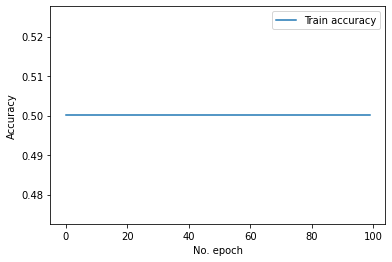

In [42]:
plt.plot(history_model.history['accuracy'], label='Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [43]:
model.save('week_8.h5')